Import Libraries

In [70]:
import pandas as pd
import numpy as np
import scipy

# Plotting packages.
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline 

# Machine learning package.
import sklearn

Import and clean up data

In [76]:
#function to convert male/female/NA into 0/1/2
def gender_to_number(gender):
    if gender=="Male":
        return 0
    if gender=="Female":
        return 1
    else:
        return 2
    
pd_data = pd.read_csv("techSalaries2017.csv", quotechar='"', converters={"gender": gender_to_number})
data = pd_data.to_numpy()
print(data.shape)

#column 3 is total annual compensation (what we try to predict), 0-2 are neglected as they are not quantitative
X,y = data[0:,4:], data[0:,3]
num_rows, num_cols = X.shape
#print(num_rows)
#we delete the rows where education is NA
education_na = []
for i in range(num_rows):
    if (type(X[i][17])==type(1.0)):
        education_na.append(i)
        
X = np.delete(X,education_na,0)
#we need to delete the corresponding data from y as well
y = np.delete(y,education_na,0)
num_rows, num_cols = X.shape
print("Number of datasets after omitting datasets where education is NA: ",num_rows)

#we delete the rows where race is NA
num_rows, num_cols = X.shape
race_na = []
for i in range(num_rows):
    if (type(X[i][16])==type(1.0)):
        race_na.append(i)
        
X = np.delete(X,race_na,0)
y = np.delete(y,race_na,0)
num_rows, num_cols = X.shape
print("Number of datasets after omitting datasets where race is NA: ",num_rows)

#delete columns "Education" and "Race" as they are represented by other columns numerically
X = np.delete(X,[16,17],1)

#delete column "Highschool" so the model will not overdetermine over education level
#also delete column "Race_Two_Or_More" along the same logic as above
X = np.delete(X,[9,13],1)

#delete columns "basesalary", "stockgrantvalue", and "bonus", as the sum of these is the value we are trying to
#predict, hence making the model self-fulfilling and therefore not meaningful
X = np.delete(X,[0,1,2],1)
print("Example row: ",X[0])

#delete datasets where gender is NA
num_rows, num_cols = X.shape
gender_na = []
for i in range(num_rows):
    if (X[i][2]==2):
        gender_na.append(i)
        
X = np.delete(X,gender_na,0)
y = np.delete(y,gender_na,0)
num_rows, num_cols = X.shape
print("Number of datasets after omitting datasets where gender is NA: ",num_rows)

(62642, 27)
Number of datasets after omitting datasets where education is NA:  30370
Number of datasets after omitting datasets where race is NA:  21681
Example row:  [5.0 5.0 0 0 0 1 0 1 0 0 0 45 68.891 9 1166 3.04]
Number of datasets after omitting datasets where gender is NA:  21485


Prediction with OLS linear regression and R-Squared for predictors

R-Squared for years of experience: 0.16086386858353963
R-Squared for years at company: 0.028069721404116454
R-Squared for gender: 0.0015087176698689309
R-Squared for education: 0.03663002928841441
R-Squared for race: 0.0027676922897398315
R-Squared for age: 0.06421789533005462
R-Squared for height: 0.0001289359645861854
R-Squared for zodiac: 6.7574276396698e-05
R-Squared for SAT: 0.11064003940759848
R-Squared for GPA: 0.09340575536616413
R-Squared for all variables: 0.26509801851946435


Text(0.5, 1.0, 'R^2 = 0.265')

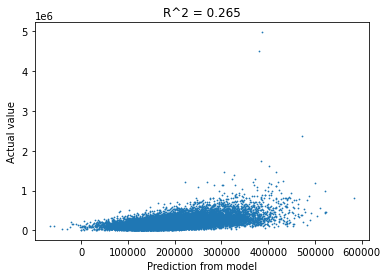

In [80]:
#importing library for linear regression
from sklearn.linear_model import LinearRegression

# # Model 1: years of experience
model = LinearRegression()
model = LinearRegression().fit(X[:,0:1],y)
rSqr = model.score(X[:,0:1],y)
print("R-Squared for years of experience:",rSqr)

# # Model 2: years at company
model = LinearRegression()
model = LinearRegression().fit(X[:,1:2],y)
rSqr = model.score(X[:,1:2],y)
print("R-Squared for years at company:",rSqr)

# # Model 3: gender
model = LinearRegression()
model = LinearRegression().fit(X[:,2:3],y)
rSqr = model.score(X[:,2:3],y)
print("R-Squared for gender:",rSqr)

# # Model 4: education
model = LinearRegression()
model = LinearRegression().fit(X[:,3:7],y)
rSqr = model.score(X[:,3:7],y)
print("R-Squared for education:",rSqr)

# # Model 5: race
model = LinearRegression()
model = LinearRegression().fit(X[:,7:11],y)
rSqr = model.score(X[:,7:11],y)
print("R-Squared for race:",rSqr)

# # Model 6: age
model = LinearRegression()
model = LinearRegression().fit(X[:,11:12],y)
rSqr = model.score(X[:,11:12],y)
print("R-Squared for age:",rSqr)

# # Model 7: height
model = LinearRegression()
model = LinearRegression().fit(X[:,12:13],y)
rSqr = model.score(X[:,12:13],y)
print("R-Squared for height:",rSqr)

# # Model 8: zodiac
model = LinearRegression()
model = LinearRegression().fit(X[:,13:14],y)
rSqr = model.score(X[:,13:14],y)
print("R-Squared for zodiac:",rSqr)

# # Model 9: SAT
model = LinearRegression()
model = LinearRegression().fit(X[:,14:15],y)
rSqr = model.score(X[:,14:15],y)
print("R-Squared for SAT:",rSqr)

# # Model 10: GPA
model = LinearRegression()
model = LinearRegression().fit(X[:,15:16],y)
rSqr = model.score(X[:,15:16],y)
print("R-Squared for GPA:",rSqr)

# # Model 11: All variables considered
model = LinearRegression()
model = LinearRegression().fit(X[:,0:16],y)
rSqr = model.score(X[:,0:16],y)
print("R-Squared for all variables:",rSqr)


#Visualize: actual vs. predicted value (from model)
yHat = model.predict(X[:,0:16])
plt.plot(yHat,y,'o',markersize=.75) 
plt.xlabel('Prediction from model') 
plt.ylabel('Actual value')  
plt.title('R^2 = {:.3f}'.format(rSqr))